In [25]:
using LinearAlgebra
using Plots

In [26]:
function generate_subspace(n)
    A = randn(n, n)
    Q, _ = qr(A)
    return Q[:, 1:2]
   
end

generate_subspace (generic function with 1 method)

In [27]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [28]:
function reverse_draw(points)
    n = size(points, 2) - 1  
    E = diff(points, dims=2)  
    
    e = E[1, :] .+ im * E[2, :]  
    z = sqrt.(e)  
    
    M = hcat(real(z), imag(z))  
    return M
end

reverse_draw (generic function with 1 method)

In [29]:
n=3
M= generate_subspace(n)
display(M)
points = draw(M, n)
M2 = reverse_draw(points)
display(M2)

3×2 Matrix{Float64}:
 -0.972247  -0.168641
  0.206181  -0.290026
  0.110571  -0.942043

3×2 Matrix{Float64}:
 0.972247   0.168641
 0.206181  -0.290026
 0.110571  -0.942043

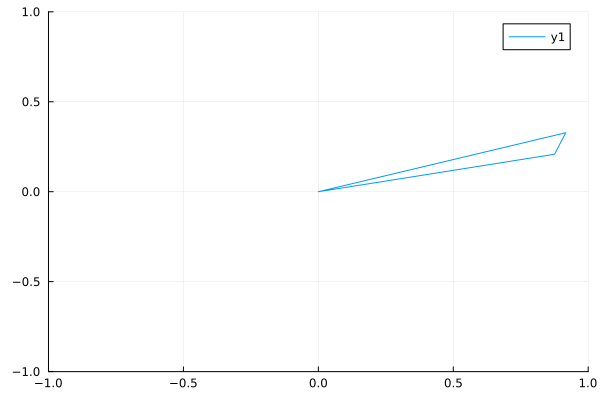

In [30]:
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])